## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 7.6 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9912422/9912422 [00:00<00:00, 11894754.39it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71677925.34it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 12162931.31it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2324936.39it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Text(0.5, 1.0, 'Image label: 2')

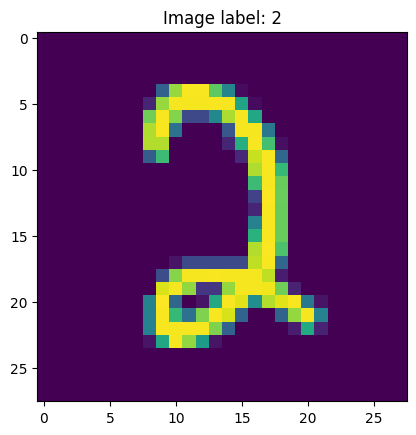

In [3]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [4]:
# Creating model instance
activation = nn.ELU

features = 28 * 28

model = nn.Sequential(
    nn.Flatten(start_dim = 1),
    nn.Linear(features, 128),
    activation(),
    nn.Linear(128, 128),
    activation(),
    nn.Linear(128, 10)
)

Локальные тесты для проверки вашей модели доступны ниже:

In [5]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [6]:
criterion = nn.CrossEntropyLoss()  #YOUR CODE. Select a loss function
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_data_loader, "valid": test_data_loader}

In [9]:
from tqdm.auto import tqdm
device = "cpu"
batch_size = 32

In [12]:
epochs = 10
accuracy = {'train': [], 'valid': []}

for epoch in tqdm(range(epochs)):
    for mode, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0

        for x_batch, y_batch in dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            if mode == 'train':
                model.train()
                optimizer.zero_grad()
                outputs = model(x_batch)

            else:
                model.eval()
                with torch.no_grad():
                    outputs = model(x_batch)

            preds = outputs.argmax(-1)
            correct = (preds == y_batch).sum()
            all = batch_size
            epoch_correct += correct.item()
            epoch_all += all

            if mode == 'train':
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

        if mode == 'train':
            print(f'Epoch {epoch + 1}: ')
        accuracy[mode].append(epoch_correct/epoch_all)
        print(f'accuracy: {epoch_correct/epoch_all}')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1: 
accuracy: 0.9682


 10%|█         | 1/10 [00:06<00:56,  6.24s/it]

accuracy: 0.9683506389776357
Epoch 2: 
accuracy: 0.97645


 20%|██        | 2/10 [00:12<00:49,  6.22s/it]

accuracy: 0.9680511182108626
Epoch 3: 
accuracy: 0.9808333333333333


 30%|███       | 3/10 [00:18<00:43,  6.25s/it]

accuracy: 0.9738418530351438
Epoch 4: 
accuracy: 0.9846666666666667


 40%|████      | 4/10 [00:25<00:37,  6.26s/it]

accuracy: 0.972444089456869
Epoch 5: 
accuracy: 0.9885333333333334


 50%|█████     | 5/10 [00:31<00:31,  6.29s/it]

accuracy: 0.974341054313099
Epoch 6: 
accuracy: 0.98965


 60%|██████    | 6/10 [00:37<00:25,  6.26s/it]

accuracy: 0.972444089456869
Epoch 7: 
accuracy: 0.99095


 70%|███████   | 7/10 [00:44<00:18,  6.33s/it]

accuracy: 0.9775359424920128
Epoch 8: 
accuracy: 0.99245


 80%|████████  | 8/10 [00:50<00:12,  6.34s/it]

accuracy: 0.9770367412140575
Epoch 9: 
accuracy: 0.99345


 90%|█████████ | 9/10 [00:56<00:06,  6.29s/it]

accuracy: 0.9785343450479234
Epoch 10: 
accuracy: 0.9944


100%|██████████| 10/10 [01:02<00:00,  6.28s/it]

accuracy: 0.9795327476038339


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [13]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [14]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.9975


In [15]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [16]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9811


Проверка, что необходимые пороги пройдены:

In [17]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

In [18]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!